In [ ]:
%pip install xarray[complete]

In [61]:
import xarray as xr

ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast/latest.zarr?email=optional@email.com")
ds

<xarray.Dataset> Size: 13TB
Dimensions:                                         (init_time: 29,
                                                     ensemble_member: 31,
                                                     lead_time: 181,
                                                     latitude: 721,
                                                     longitude: 1440)
Coordinates:
  * ensemble_member                                 (ensemble_member) uint16 62B ...
    expected_forecast_length                        (init_time) timedelta64[ns] 232B dask.array<chunksize=(29,), meta=np.ndarray>
    ingested_forecast_length                        (init_time) timedelta64[ns] 232B dask.array<chunksize=(29,), meta=np.ndarray>
  * init_time                                       (init_time) datetime64[ns] 232B ...
  * latitude                                        (latitude) float64 6kB 90...
  * lead_time                                       (lead_time) timedelta64[ns] 1kB ...
  * longitude                                       (longitude) float64 12kB ...
    valid_time                                      (init_time, lead_time) datetime64[ns] 42kB dask.array<chunksize=(29, 181), meta=np.ndarray>
Data variables: (12/34)
    categorical_freezing_rain_surface               (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    categorical_freezing_rain_surface_avg           (init_time, lead_time, latitude, longitude) float32 22GB dask.array<chunksize=(1, 181, 146, 144), meta=np.ndarray>
    categorical_ice_pellets_surface                 (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    categorical_ice_pellets_surface_avg             (init_time, lead_time, latitude, longitude) float32 22GB dask.array<chunksize=(1, 181, 146, 144), meta=np.ndarray>
    categorical_rain_surface                        (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    categorical_rain_surface_avg                    (init_time, lead_time, latitude, longitude) float32 22GB dask.array<chunksize=(1, 181, 146, 144), meta=np.ndarray>
    ...                                              ...
    wind_u_100m                                     (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    wind_u_10m                                      (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    wind_u_10m_avg                                  (init_time, lead_time, latitude, longitude) float32 22GB dask.array<chunksize=(1, 181, 146, 144), meta=np.ndarray>
    wind_v_100m                                     (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    wind_v_10m                                      (init_time, ensemble_member, lead_time, latitude, longitude) float32 676GB dask.array<chunksize=(1, 31, 181, 73, 72), meta=np.ndarray>
    wind_v_10m_avg                                  (init_time, lead_time, latitude, longitude) float32 22GB dask.array<chunksize=(1, 181, 146, 144), meta=np.ndarray>
Attributes:
    attribution:          NOAA NWS NCEP GEFS data processed by dynamical.org ...
    dataset_id:           noaa-gefs-forecast
    description:          Weather forecasts from the Global Ensemble Forecast...
    forecast_domain:      Forecast lead time 0-840 hours (0-35 days) ahead
    forecast_resolution:  Forecast step 0-240 hours: 3 hourly, 243-840 hours:...
    name:                 NOAA GEFS forecast
    spatial_domain:       Global
    spatial_resolution:   0-240 hours: 0.25 degrees (~20km), 243-840 hours: 0...
    time_domain:        

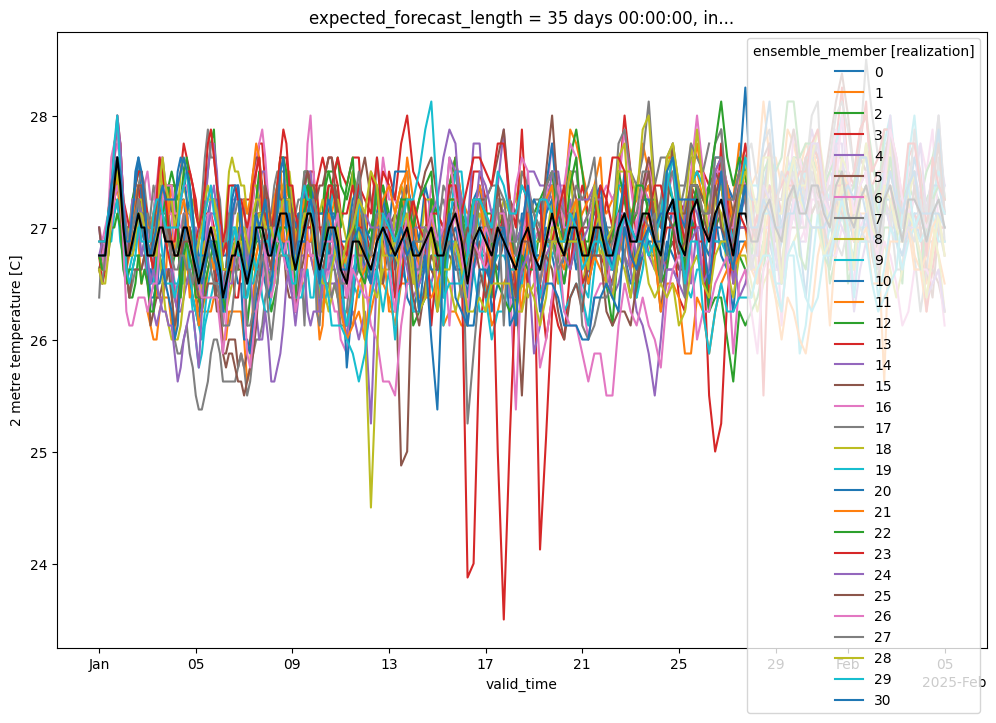

In [62]:
plot_ds = ds.sel(init_time="2025-01-01T00", latitude=0, longitude=0)
plot_ds["temperature_2m"].plot(x="valid_time", hue="ensemble_member", figsize=(12, 8))
plot_ds["temperature_2m_avg"].plot(x="valid_time", c="black")

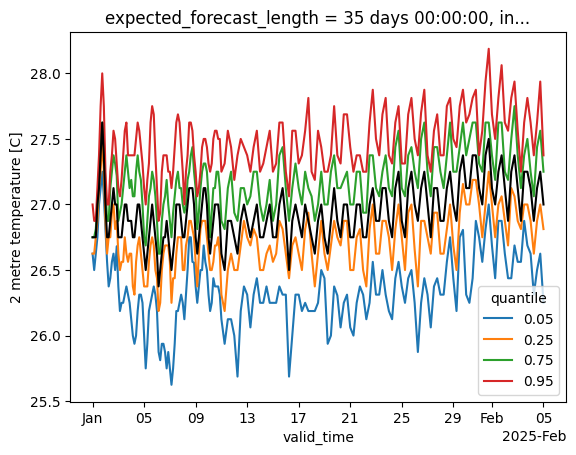

In [63]:
plot_ds = ds.sel(init_time="2025-01-01T00", latitude=0, longitude=0)
(
    plot_ds["temperature_2m"]
    .quantile([0.05, 0.25, 0.75, 0.95], dim="ensemble_member")
    .plot(x="valid_time", hue="quantile")
)
plot_ds["temperature_2m_avg"].plot(x="valid_time", c="black")

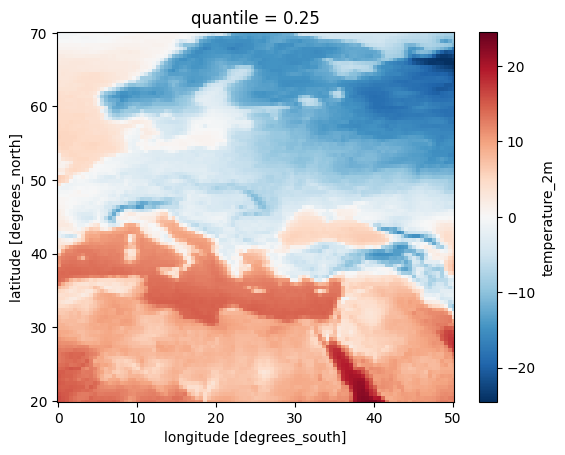

In [65]:
(
    ds["temperature_2m"]
    .sel(init_time="2025-01-01T00")
    .sel(lead_time="30d")
    .sel(latitude=slice(70, 20), longitude=slice(0, 50))
    .quantile(0.25, dim="ensemble_member") # 1 in 4 chance it gets colder than this
    .plot()
)

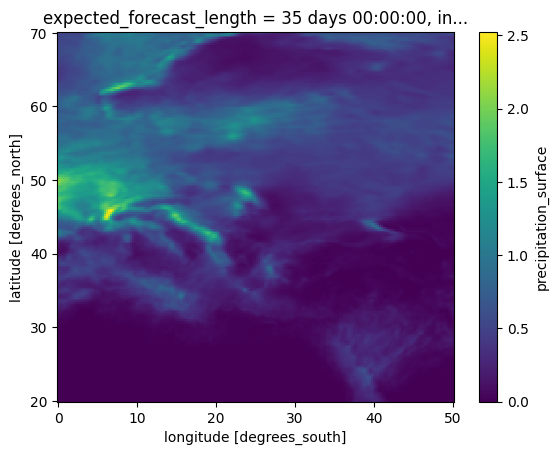

In [66]:
# Areas of highest uncertainty in forecast precipitation over the first 7 days of 2025
(
    ds["precipitation_surface"] 
    .sel(init_time="2025-01-01T00") 
    .sel(latitude=slice(70, 20), longitude=slice(0, 50))
    .std(dim="ensemble_member")  # standard deviation across ensemble
    .sel(lead_time=slice("0h", "7d")).mean(dim="lead_time")  # averaged over first 7 days
    .plot()
)